In [1]:
#climate_anomaly.py
#by: Elliott Budd
#10/27/2020
#I have never given or recieved nor have I tolerated others use of unauthorized aid

#This program will read in data to calculate the grid anomalies and plot on a map using cartopy. The program will thenn plot anonomaly 
#data for Minneapolis MN on a line graph with matplotlib in conjuncation with the mean.

In [2]:
#import modules

from datetime import datetime, timedelta
import numpy as np
import matplotlib.pylab as plt
from metpy.units import units
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
#read in data
temp = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.sig995.mon.mean.nc')
ltm= xr.open_dataset('https://psl.noaa.gov/psd//thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.sig995.mon.ltm.nc')

/anaconda/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/anaconda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [4]:
temp

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 874)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-10-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Thu May  4 20:11:16 2000: ncrcat -d time...
    title:                           monthly mean air.sig995 from the NCEP Re...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
sorted(list(temp.keys()))

['air']

In [6]:
temp

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 874)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-10-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Thu May  4 20:11:16 2000: ncrcat -d time...
    title:                           monthly mean air.sig995 from the NCEP Re...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

In [7]:
#subset data to just 2018 and average
start_date = datetime(2018,1,1,0,0)
end_date =  datetime(2018,12,31,0,0)
temp_2018 = temp.air.metpy.sel(time = slice(start_date,end_date))

temp_2018_avr = np.nanmean(temp_2018, axis=0)

In [8]:
#select long tem data and find average

temp_81_10 = ltm.air.metpy.sel()

avr_81_10 = np.nanmean(temp_81_10,axis=0)

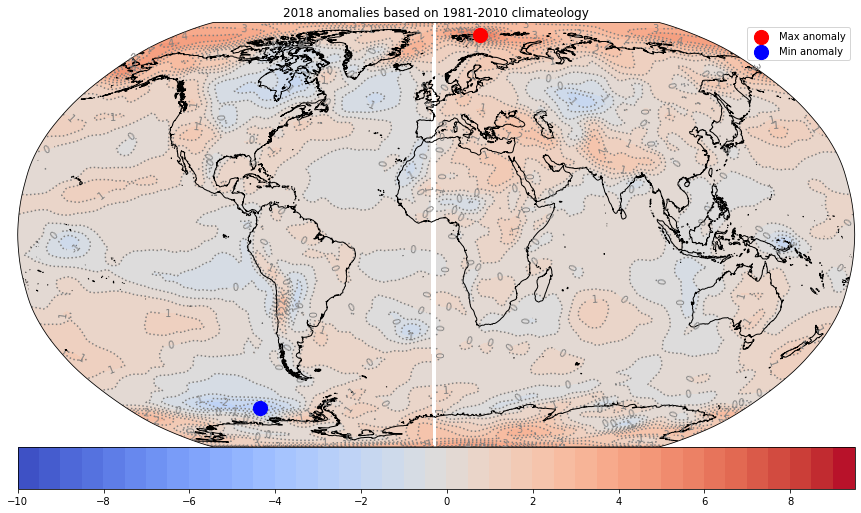

<Figure size 432x288 with 0 Axes>

In [21]:
#calcuilate anomalies and plot anomaly map

anomaly_2018 = temp_2018_avr - avr_81_10

max_2018 = np.max(anomaly_2018)
min_2018 = np.min(anomaly_2018)

max_lat_2018, max_lon_2018 = np.where(anomaly_2018==max_2018)
min_lat_2018, min_lon_2018 = np.where(anomaly_2018==min_2018)

mapcrs = ccrs.Robinson()
fig = plt.figure(figsize=(15,13))

ax = fig.add_subplot(111, projection=mapcrs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor = 'black')

cf = ax.contourf(temp_2018.lon, temp_2018.lat, anomaly_2018, levels = np.arange(-10,10,0.5),
                 cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())

cs = ax.contour(temp_2018.lon,temp_2018.lat, anomaly_2018, levels=np.arange(-10,10,0.5),
                colors = 'grey',linestyles = 'dotted', transform = ccrs.PlateCarree(),zorder=1)

ax.scatter(temp_2018.lon[max_lon_2018],temp_2018.lat[max_lat_2018],transform=ccrs.PlateCarree(),
           color = 'red', s = 200, label = 'Max anomaly', zorder=10)


ax.scatter(temp_2018.lon[min_lon_2018],temp_2018.lat[min_lat_2018],transform=ccrs.PlateCarree(),
           color = 'blue', s = 200, label = 'Min anomaly', zorder=10)


plt.colorbar(cf, pad=0,orientation='horizontal')

plt.clabel(cs, fmt='%d')
plt.legend()
plt.title('2018 anomalies based on 1981-2010 climateology')
plt.show()
plt.savefig('global_anomaly_2018.png')